<a href="https://colab.research.google.com/github/helderthadeu/face-recognition/blob/main/Deteccao_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [2]:


# Carregar o ResNet50 sem as camadas de classificação superiores
# Adicionamos `include_top=False` e definimos o `input_shape`
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [3]:
# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Adicionar novas camadas para o nosso problema
num_classes = 3 # Número de classes
x = base_model.output
x = GlobalAveragePooling2D()(x) # Converte os mapas de características para um vetor
x = Dense(1024, activation='relu')(x) # Camada densa com 1024 neurônios
predictions = Dense(num_classes, activation='softmax')(x) # Camada de saída com o número de classes (faces)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# Substitua 'num_classes' pelo número de pessoas no seu dataset
num_classes = 3  # Exemplo: Se você tiver 3 pessoas

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Preparar o gerador de dados (certifique-se de que as imagens estão na estrutura de pastas correta)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Files/FotosTreinamento',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Files/FotosValidation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Treinar o modelo
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Found 1986 images belonging to 3 classes.
Found 288 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 817s 13s/step - accuracy: 0.8114 - loss: 0.8106 - val_accuracy: 0.9097 - val_loss: 0.2775
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8962 - loss: 0.3470 - val_accuracy: 0.9062 - val_loss: 0.3511
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9106 - loss: 0.3035 - val_accuracy: 0.9236 - val_loss: 0.2327
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9111 - loss: 0.2849 - val_accuracy: 0.9167 - val_loss: 0.2021
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9236 - loss: 0.2329 - val_accuracy: 0.9167 - val_loss: 0.2003
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9159 - loss: 0.2496 - val_accuracy: 0.9167 - val_loss: 0.1999
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9266 - loss: 0.2105 - val_accuracy: 0.9306 - val_loss: 0.1964
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9261 - loss: 0.2059 - val_accuracy: 0.9410 - val_los

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [15]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print("Mapeamento de Classes (Índice -> Nome):")
print(labels)

Mapeamento de Classes (Índice -> Nome):
{0: 'helder', 1: 'luana', 2: 'outros'}


In [18]:
img_path = 'teste.jpg' # <-- MUDE AQUI

# Carrega a imagem, redimensionando para o tamanho que o modelo espera (224x224)
img = image.load_img(img_path, target_size=(224, 224))

# Converte a imagem para um array numpy
x = image.img_to_array(img)

# Adiciona uma dimensão extra para representar o 'batch' (lote).
# O modelo espera um lote de imagens, então uma única imagem precisa ter a forma (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Pré-processa a imagem da MESMA forma que as imagens de treinamento.
# No seu caso, você usou `rescale=1./255` no ImageDataGenerator.
x = x / 255.0

In [19]:
predictions = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step



Caminho da Imagem: teste.jpg
Previsão: 'outros'
Confiança: 87.27%


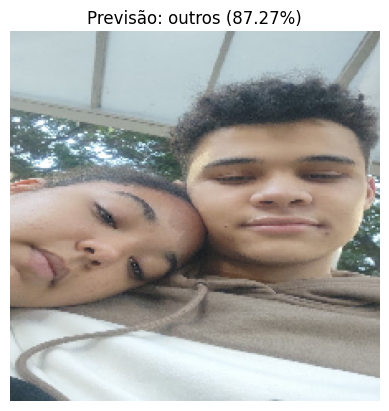

In [21]:
predicted_class_index = np.argmax(predictions[0])

# Usamos nosso dicionário 'labels' para obter o nome da classe correspondente
predicted_class_name = labels[predicted_class_index]

# Obtém a confiança (probabilidade) da previsão
confidence = predictions[0][predicted_class_index] * 100

# Exibir os resultados
print(f"\nCaminho da Imagem: {img_path}")
print(f"Previsão: '{predicted_class_name}'")
print(f"Confiança: {confidence:.2f}%")

# Opcional: Mostrar a imagem com o resultado
plt.imshow(img)
plt.title(f"Previsão: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()
